In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run40-IGH-HUMAN-shared-clones.xlsx"
ptfile = "20201116-RUN40-DataSheet.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Chain,Patient,SampleInfo,UMI,Group,HEK cells,RACE,Constant,ChainOrig,Sample
0,N711_S502,A11-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S9,...,BCRh,A1,Spleen-day21,no,VERA,yes,no,no,mBCRh,A11-Bh_S9
1,N712_S502,A12-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S10,...,BCRh,A2,Spleen-day21,no,VERA,yes,no,no,mBCRh,A12-Bh_S10
2,N714_S502,A13-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S11,...,BCRh,A3,Spleen-day21,no,VERA,yes,no,no,mBCRh,A13-Bh_S11
3,N715_S502,A14-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S12,...,BCRh,A4,Spleen-day21,no,VERA,yes,no,no,mBCRh,A14-Bh_S12
4,N716_S502,A15-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S13,...,BCRh,A5,Spleen-day21,no,VERA,yes,no,no,mBCRh,A15-Bh_S13


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones") and "IGH_HUMAN" in x]
myfiles.sort()
myfiles = myfiles[-4:]
myfiles

['cdr3-clones-IgSub-IGH_HUMAN-after-reassignment.csv',
 'cdr3-clones-Vasculitis-IGH_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,ID598t0-B2_S224,CAKGSTVVSLDDSWGQGTLVT,50
1,ID598t0-B2_S224,CARGTGTSWFDSWGQGTLVT,44
2,ID598t0-B2_S224,CARSILMGPSQPRHIDYWGQGILVT,38
3,ID598t0-B2_S224,CVRDFSWSFDQWGQGTLVT,28
4,ID598t0-B2_S224,CVGLGNYIYWGQGTLVT,22


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
69557,VC023V2-SUB-U_S182,WAKGGDNEGWFDPWGQGTLVT,1
69558,VC023V2-SUB-U_S182,WVGGGGWDLAYWGHGTLVT,1
69559,VC023V2-SUB-U_S182,YAKETMEMSMPYWHFDLWGRGTQVT,1
69560,VC023V2-SUB-U_S182,YAKGGDNEGWFDPWGQGTLVT,1
69561,VC023V2-SUB-U_S182,YAKVLRSYSTYYTMDVWGLGTTVT,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Species,Chain,Patient,SampleInfo,UMI,Group,HEK cells,RACE,Constant,ChainOrig
0,ID598t0-B2_S224,CAKGSTVVSLDDSWGQGTLVT,50,N721_S515,ID598t0-B2,NaN,NaN,NaN,NaN,NaN,...,human,BCRh,ID598t0,paxgene,yes,NaN,no,no,no,BCRh
1,ID598t0-B2_S224,CARGTGTSWFDSWGQGTLVT,44,N721_S515,ID598t0-B2,NaN,NaN,NaN,NaN,NaN,...,human,BCRh,ID598t0,paxgene,yes,NaN,no,no,no,BCRh
2,ID598t0-B2_S224,CARSILMGPSQPRHIDYWGQGILVT,38,N721_S515,ID598t0-B2,NaN,NaN,NaN,NaN,NaN,...,human,BCRh,ID598t0,paxgene,yes,NaN,no,no,no,BCRh
3,ID598t0-B2_S224,CVRDFSWSFDQWGQGTLVT,28,N721_S515,ID598t0-B2,NaN,NaN,NaN,NaN,NaN,...,human,BCRh,ID598t0,paxgene,yes,NaN,no,no,no,BCRh
4,ID598t0-B2_S224,CVGLGNYIYWGQGTLVT,22,N721_S515,ID598t0-B2,NaN,NaN,NaN,NaN,NaN,...,human,BCRh,ID598t0,paxgene,yes,NaN,no,no,no,BCRh


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,A2,VC008V3-2-B_S158,CAAIPAYWGQGTLVT,14
1,A2,VC008V3-2-B_S158,CAATLGGLGEFYYGMDVWGQGTTVT,9
2,A2,VC008V3-2-B_S158,CAGAGGDCSSTTCSDPDHYYYYYMDVWGKGTTVT,1
3,A2,VC008V3-2-B_S158,CAGDFDSSHFFDYWGQGTLVT,1
4,A2,VC008V3-2-B_S158,CAGDREMVVIDYWGQGTLVT,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,GPA161-2-B_S140,138050
1,GPA161-2-SUB-U_S184,16809
2,GPA161-B_S139,7994
3,GPA161-SUB-U_S183,1715
4,ID598t0-B2_S224,19962


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,A2,VC008V3-2-B_S158,CAAIPAYWGQGTLVT,14,10540
1,A2,VC008V3-2-B_S158,CAATLGGLGEFYYGMDVWGQGTTVT,9,10540
2,A2,VC008V3-2-B_S158,CAGAGGDCSSTTCSDPDHYYYYYMDVWGKGTTVT,1,10540
3,A2,VC008V3-2-B_S158,CAGDFDSSHFFDYWGQGTLVT,1,10540
4,A2,VC008V3-2-B_S158,CAGDREMVVIDYWGQGTLVT,1,10540


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
162269,VC023V2,VC023V2-SUB-U_S182,YAKETMEMSMPYWHFDLWGRGTQVT,1,28998
162270,VC023V2,VC023V2-SUB-U_S182,YAKGGDNEGWFDPWGQGTLVT,1,28998
162271,VC023V2,VC023V2-SUB-U_S182,YAKVLRSYSTYYTMDVWGLGTTVT,1,28998
162272,VC023V2,VC023V2-SUB-U_S182,YARDALVYASMWTGYFQHWGQGTLVT,2,28998
162273,VC023V2,VC023V2-SUB-U_S182,YVGGGGWDLAYWGHGTLVT,2,28998


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,A2,VC008V3-2-B_S158,CAAIPAYWGQGTLVT,14,10540,0.132827
1,A2,VC008V3-2-B_S158,CAATLGGLGEFYYGMDVWGQGTTVT,9,10540,0.085389
2,A2,VC008V3-2-B_S158,CAGAGGDCSSTTCSDPDHYYYYYMDVWGKGTTVT,1,10540,0.009488
3,A2,VC008V3-2-B_S158,CAGDFDSSHFFDYWGQGTLVT,1,10540,0.009488
4,A2,VC008V3-2-B_S158,CAGDREMVVIDYWGQGTLVT,1,10540,0.009488


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['VC008V3-2-B_S158',
 'VC008V3-B_S157',
 'VC008VV1-2-B_S156',
 'GPA161-2-B_S140',
 'GPA161-2-SUB-U_S184',
 'GPA161-B_S139',
 'GPA161-SUB-U_S183',
 'ID598t0-B2_S224',
 'ID598t0-B3_S228',
 'ID629t0-B2_S225']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,VC008V3-B_S157,VC008V3-2-B_S158,58.311111,38.235294
1,VC008VV1-2-B_S156,VC008V3-2-B_S158,0.056275,0.009488
2,VC008V3-2-B_S158,GPA161-2-B_S140,1.859583,0.089823
3,VC008V3-2-B_S158,GPA161-2-SUB-U_S184,0.000000,0.000000
4,GPA161-B_S139,VC008V3-2-B_S158,0.012509,0.009488


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,VC008V3-B_S157,VC008V3-2-B_S158,58.311111,38.235294,A2,A2
1,VC008VV1-2-B_S156,VC008V3-2-B_S158,0.056275,0.009488,A2,A2
2,GPA161-B_S139,VC008V3-2-B_S158,0.012509,0.009488,GPA161,A2
3,VC008V3-2-SUB-U_S203,VC008V3-2-B_S158,72.843071,10.142315,VC008V3,A2
4,VC008V3-SUB-U_S202,VC008V3-2-B_S158,15.412186,3.994307,VC008V3,A2


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,498,VC008VV1-2-B_S156,VC008VV1-B_S141,86.719190,79.791017,A2,VC008VV1
1,186,VC002V1-B_S134,VC002V1-2-B_S135,82.629255,76.589353,VC002V1,VC002V1
2,188,VC002V1-2-SUB-U_S179,VC002V1-2-B_S135,78.410006,68.827370,VC002V1,VC002V1
3,163,ID657t0-B3_S231,ID657t0-B2_S227,70.806987,67.314794,ID657t0,ID657t0
4,236,VC002V1-B_S134,VC002V1-SUB-U_S178,72.605416,49.420067,VC002V1,VC002V1


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,498,VC008VV1-2-B_S156,VC008VV1-B_S141,86.719190,79.791017,A2,VC008VV1,different
1,186,VC002V1-B_S134,VC002V1-2-B_S135,82.629255,76.589353,VC002V1,VC002V1,same
2,188,VC002V1-2-SUB-U_S179,VC002V1-2-B_S135,78.410006,68.827370,VC002V1,VC002V1,same
3,163,ID657t0-B3_S231,ID657t0-B2_S227,70.806987,67.314794,ID657t0,ID657t0,same
4,236,VC002V1-B_S134,VC002V1-SUB-U_S178,72.605416,49.420067,VC002V1,VC002V1,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run40-IGH-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,498,VC008VV1-2-B_S156,VC008VV1-B_S141,86.719190,79.791017,A2,VC008VV1,different
1,1,186,VC002V1-B_S134,VC002V1-2-B_S135,82.629255,76.589353,VC002V1,VC002V1,same
2,2,188,VC002V1-2-SUB-U_S179,VC002V1-2-B_S135,78.410006,68.827370,VC002V1,VC002V1,same
3,3,163,ID657t0-B3_S231,ID657t0-B2_S227,70.806987,67.314794,ID657t0,ID657t0,same
4,4,236,VC002V1-B_S134,VC002V1-SUB-U_S178,72.605416,49.420067,VC002V1,VC002V1,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,498,VC008VV1-2-B_S156,VC008VV1-B_S141,86.719190,79.791017,A2,VC008VV1,different,VC008VV1-2-B_S156->VC008VV1-B_S141,blue
1,1,186,VC002V1-B_S134,VC002V1-2-B_S135,82.629255,76.589353,VC002V1,VC002V1,same,VC002V1-B_S134->VC002V1-2-B_S135,purple
2,2,188,VC002V1-2-SUB-U_S179,VC002V1-2-B_S135,78.410006,68.827370,VC002V1,VC002V1,same,VC002V1-2-SUB-U_S179->VC002V1-2-B_S135,purple
3,3,163,ID657t0-B3_S231,ID657t0-B2_S227,70.806987,67.314794,ID657t0,ID657t0,same,ID657t0-B3_S231->ID657t0-B2_S227,purple
4,4,236,VC002V1-B_S134,VC002V1-SUB-U_S178,72.605416,49.420067,VC002V1,VC002V1,same,VC002V1-B_S134->VC002V1-SUB-U_S178,purple


Wrote run40-IGH-HUMAN-shared-clones-all.pdf to disk


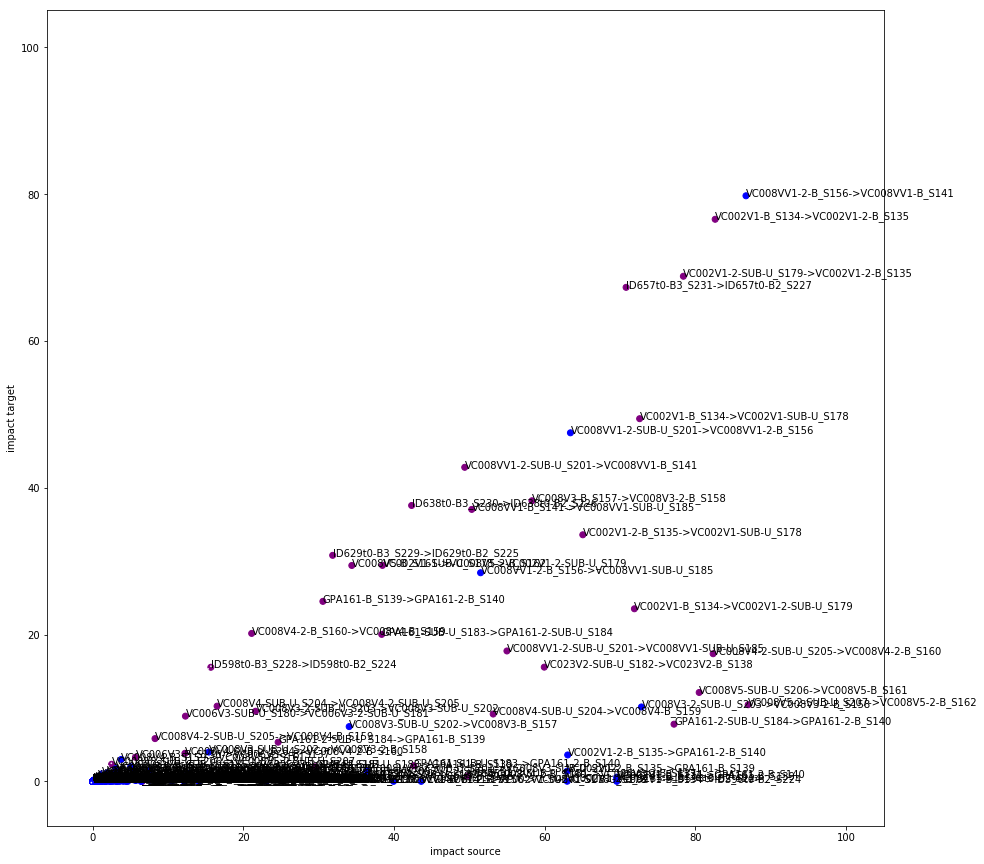

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,0,VC008VV1-2-B_S156,VC008VV1-B_S141,86.719190,79.791017,different,VC008VV1-2-B_S156->VC008VV1-B_S141,blue
1,5,VC008VV1-2-SUB-U_S201,VC008VV1-2-B_S156,63.418079,47.495779,different,VC008VV1-2-SUB-U_S201->VC008VV1-2-B_S156,blue
2,14,VC008VV1-2-B_S156,VC008VV1-SUB-U_S185,51.491277,28.428002,different,VC008VV1-2-B_S156->VC008VV1-SUB-U_S185,blue
3,26,VC008V3-2-SUB-U_S203,VC008V3-2-B_S158,72.843071,10.142315,different,VC008V3-2-SUB-U_S203->VC008V3-2-B_S158,blue
4,31,VC008V3-SUB-U_S202,VC008V3-B_S157,34.050179,7.466667,different,VC008V3-SUB-U_S202->VC008V3-B_S157,blue


Wrote run40-IGH-HUMAN-shared-clones-different-ids.pdf to disk


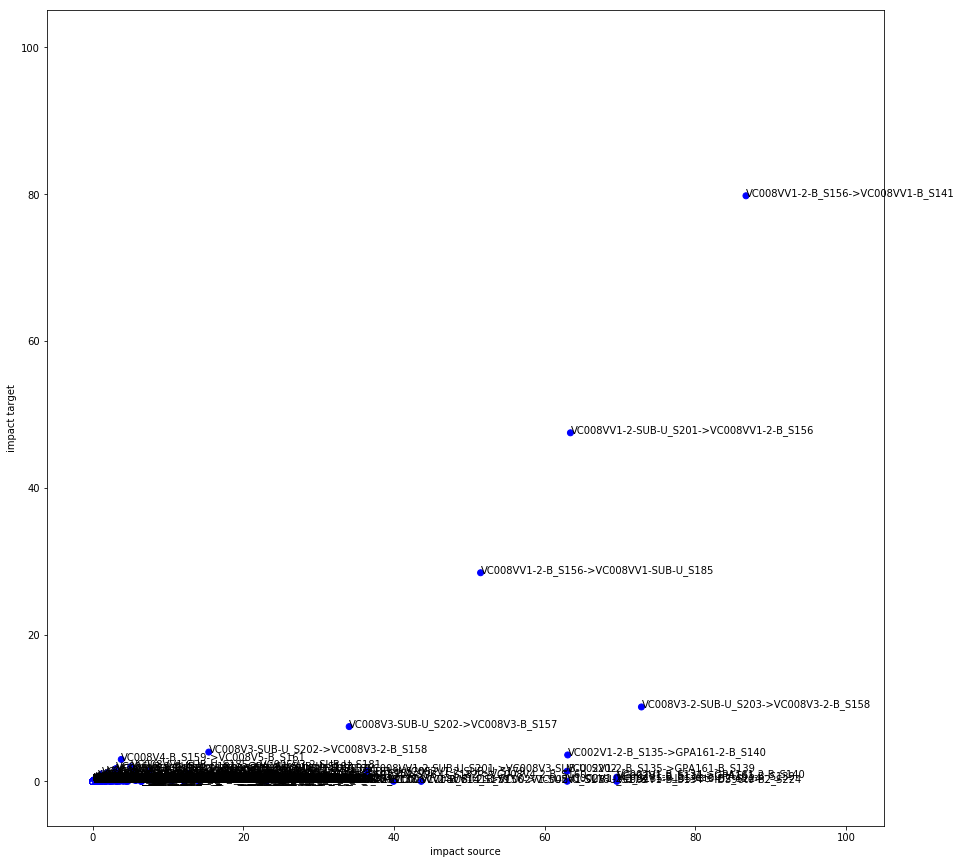

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,A2,VC008V3-2-B_S158,CAAIPAYWGQGTLVT,14,10540,0.132827
1,A2,VC008V3-2-B_S158,CAATLGGLGEFYYGMDVWGQGTTVT,9,10540,0.085389
2,A2,VC008V3-2-B_S158,CAGAGGDCSSTTCSDPDHYYYYYMDVWGKGTTVT,1,10540,0.009488
3,A2,VC008V3-2-B_S158,CAGDFDSSHFFDYWGQGTLVT,1,10540,0.009488
4,A2,VC008V3-2-B_S158,CAGDREMVVIDYWGQGTLVT,1,10540,0.009488


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient           Sample  \
                        nunique    names nunique   
cdr3pep                                            
AAAGTTGASNADYWGQGTLVT         1  ID629t0       1   
AAYGSGKLYYYGMDVWGQGTTVT       1  ID598t0       1   
AFAENKWFGGHWIDPWGQGILVT       1  ID629t0       2   
AFAENKWFGGHWTDPWGQGILVT       1  ID629t0       2   
AFDIWGQGTMVT                  1  ID638t0       1   

                                                           
                                                    names  
cdr3pep                                                    
AAAGTTGASNADYWGQGTLVT                     ID629t0-B2_S225  
AAYGSGKLYYYGMDVWGQGTTVT                   ID598t0-B2_S224  
AFAENKWFGGHWIDPWGQGILVT  ID629t0-B3_S229, ID629t0-B2_S225  
AFAENKWFGGHWTDPWGQGILVT  ID629t0-B3_S229, ID629t0-B2_S225  
AFDIWGQGTMVT                              ID638t0-B3_S230

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient                  cdr3pep               A2                 \
Sample                           VC008V3-2-B_S158 VC008V3-B_S157   
0          AAAGTTGASNADYWGQGTLVT              NaN            NaN   
1        AAYGSGKLYYYGMDVWGQGTTVT              NaN            NaN   
2        AFAENKWFGGHWIDPWGQGILVT              NaN            NaN   
3        AFAENKWFGGHWTDPWGQGILVT              NaN            NaN   
4                   AFDIWGQGTMVT              NaN            NaN   

Patient                            GPA161                                    \
Sample  VC008VV1-2-B_S156 GPA161-2-B_S140 GPA161-2-SUB-U_S184 GPA161-B_S139   
0                     NaN             NaN                 NaN           NaN   
1                     NaN             NaN                 NaN           NaN   
2                     NaN             NaN                 NaN           NaN   
3                     NaN             NaN                 NaN           NaN   
4                     NaN             NaN                 NaN           NaN   

Patient                           ID598t0                        ...          \
Sample  GPA161-SUB-U_S183 ID598t0-B2_S224 ID598t0-B3_S228        ...           
0                     NaN             NaN             NaN        ...           
1                     NaN         0.00501             NaN        ...           
2                     NaN             NaN             NaN        ...           
3                     NaN             NaN             NaN        ...           
4                     NaN             NaN             NaN        ...           

Patient            VC008V4          VC008V5                       \
Sample  VC008V4-SUB-U_S204 VC008V5-2-B_S162 VC008V5-2-SUB-U_S207   
0                      NaN              NaN                  NaN   
1                      NaN              NaN                  NaN   
2                      NaN              NaN                  NaN   
3                      NaN              NaN                  NaN   
4                      NaN              NaN                  NaN   

Patient                                                VC008VV1  \
Sample  VC008V5-B_S161 VC008V5-SUB-U_S206 VC008VV1-2-SUB-U_S201   
0                  NaN                NaN                   NaN   
1                  NaN                NaN                   NaN   
2                  NaN                NaN                   NaN   
3                  NaN                NaN                   NaN   
4                  NaN                NaN                   NaN   

Patient                                            VC023V2                     
Sample  VC008VV1-B_S141 VC008VV1-SUB-U_S185 VC023V2-B_S138 VC023V2-SUB-U_S182  
0                   NaN                 NaN            NaN                NaN  
1                   NaN                 NaN            NaN                NaN  
2                   NaN                 NaN            NaN                NaN  
3                   NaN                 NaN            NaN                NaN  
4                   NaN                 NaN            NaN                NaN  

[5 rows x 39 columns]

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/data/home/bioinfo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


index                         cdr3pep Patient  \
                                          nunique   
0  151248                       CWGQGTLVT       9   
1   43871                 CARDFDYWGQGTLVT       5   
2   85729          CARGPDSSAYYYAYWGQGTLVT       3   
3    8414  CAKALYGTRGYYYGFYYDALDVWGQGTTVT       3   
4  141255           CTGFGWGTSPTDFWGQGTLVT       3   

                                                      Sample  \
                                               names nunique   
0  A2, VC008V5, VC006V3, VC008V3, VC023V2, ID638t...      11   
1        ID598t0, ID657t0, VC006V3, ID638t0, ID629t0       6   
2                           ID598t0, GPA161, VC002V1       7   
3                           GPA161, VC008V5, VC006V3       6   
4                          VC008VV1, GPA161, VC002V1       6   

                                                                   A2  \
                                               names VC008V3-2-B_S158   
0  VC002V1-SUB-U_S178, VC008V3-2-B_S158, VC023V2-...         0.009488   
1  ID598t0-B2_S224, ID629t0-B2_S225, VC006V3-2-B_...              NaN   
2  VC002V1-SUB-U_S178, GPA161-B_S139, ID598t0-B2_...              NaN   
3  VC008V5-2-SUB-U_S207, GPA161-SUB-U_S183, GPA16...              NaN   
4  VC002V1-SUB-U_S178, GPA161-SUB-U_S183, VC008VV...              NaN   

                                            GPA161        ...          \
  VC008V3-B_S157 VC008VV1-2-B_S156 GPA161-2-B_S140        ...           
0            NaN               NaN        0.000724        ...           
1            NaN               NaN             NaN        ...           
2            NaN               NaN        0.001449        ...           
3            NaN               NaN        0.114451        ...           
4            NaN               NaN             NaN        ...           

             VC008V4          VC008V5                                      \
  VC008V4-SUB-U_S204 VC008V5-2-B_S162 VC008V5-2-SUB-U_S207 VC008V5-B_S161   
0                NaN         0.003231                  NaN            NaN   
1                NaN              NaN                  NaN            NaN   
2                NaN              NaN                  NaN            NaN   
3                NaN              NaN             0.006028            NaN   
4                NaN              NaN                  NaN            NaN   

                                  VC008VV1                  \
  VC008V5-SUB-U_S206 VC008VV1-2-SUB-U_S201 VC008VV1-B_S141   
0                NaN                   NaN             NaN   
1                NaN                   NaN             NaN   
2                NaN                   NaN             NaN   
3                NaN                   NaN             NaN   
4                NaN              0.047081             NaN   

                             VC023V2                     
  VC008VV1-SUB-U_S185 VC023V2-B_S138 VC023V2-SUB-U_S182  
0                 NaN            NaN           0.006897  
1                 NaN            NaN                NaN  
2                 NaN            NaN                NaN  
3                 NaN            NaN                NaN  
4                 NaN            NaN                NaN  

[5 rows x 44 columns]

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 152427
cdr3's in > 1 sample: 9504


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote run40-IGH-HUMAN-shared-clones-occurrence.xlsx to disk
